In [1]:
# we can borrow the word vectors generated using the CountVectoriser and TfidfVectoriser to
# train the binary classification Logistic Regression model and check the accuracy.

# starting the Data wrangling using pandas and numpy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid', color_codes = True)
import os
import re

%matplotlib inline

In [3]:
# loading the text data
twitter_df = pd.read_csv("twitter_train.csv")

In [4]:
twitter_df.head(50)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


input variables
1. id : is the ID of the tweet
2. Keyword : is the main word that is used to extract the tweet. both the positive and negative sentiments revolve around this words
3. Location: is the geo-location of the person tweeting.
4. Text: is the main body of the tweet. Any tweet can have only 280 characters. i.e., for example any one of the following list is a character :- [a,1,@,A... etc]
5. Target: finally the sentiment of the tweet, manually added. This makes the data labeled data, and hence, the problem a classification problem.


In [5]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
twitter_df.shape

(7613, 5)

In [7]:
twitter_df = twitter_df.dropna(how = 'all', axis = 0)

In [8]:
twitter_df.shape

(7613, 5)

In [9]:
twitter_df = twitter_df.fillna('0')

0    4342
1    3271
Name: target, dtype: int64


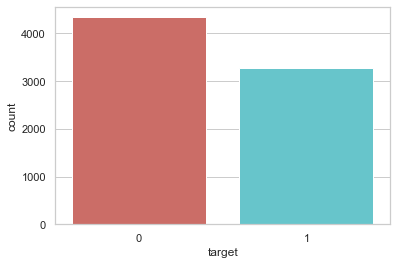

In [10]:
# the count of the overall class distribution.
print(twitter_df['target'].value_counts())
sns.countplot(x = 'target', data = twitter_df, palette='hls')

In [14]:
# the class distribution is not uniform but they are not heavily skewed to one side either.
twitter_df.groupby(['keyword', 'target'])['text'].count().reset_index()

,keyword,target,text
0,0,0,19
1,0,1,42
2,ablaze,0,23
3,ablaze,1,13
4,accident,0,11
...,...,...,...
435,wreck,0,30
436,wreck,1,7
437,wreckage,1,39
438,wrecked,0,36


In [13]:
# number of characters in a tweet.